### Decision Tree Classifier and Hyperparameter tuning

#### Tasks
- Basic Analysis
- Model building
- Hyperparameter tuning
- Accuracy score comparison

#### Dataset: https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv',sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Basic Analysis

In [2]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [3]:
len(df['quality'].unique())

6

In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
df.duplicated().sum()

240

In [7]:
df=df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
X=df.drop('quality',axis=1)
y=df['quality']

In [10]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [11]:
y

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64

#### Model building

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
model.score(X_train,y_train)

1.0

[Text(0.49278846153846156, 0.9166666666666666, 'X[10] <= 10.15\ngini = 0.652\nsamples = 910\nvalue = [5, 38, 385, 354, 115, 13]'),
 Text(0.27884615384615385, 0.75, 'X[6] <= 91.5\ngini = 0.53\nsamples = 462\nvalue = [4, 24, 288, 129, 15, 2]'),
 Text(0.15384615384615385, 0.5833333333333334, 'X[1] <= 0.417\ngini = 0.575\nsamples = 377\nvalue = [4, 23, 212, 121, 15, 2]'),
 Text(0.07692307692307693, 0.4166666666666667, 'X[9] <= 0.655\ngini = 0.622\nsamples = 84\nvalue = [0, 2, 30, 41, 9, 2]'),
 Text(0.038461538461538464, 0.25, 'X[4] <= 0.079\ngini = 0.52\nsamples = 47\nvalue = [0, 1, 24, 22, 0, 0]'),
 Text(0.019230769230769232, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.057692307692307696, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.11538461538461539, 0.25, 'X[6] <= 31.5\ngini = 0.647\nsamples = 37\nvalue = [0, 1, 6, 19, 9, 2]'),
 Text(0.09615384615384616, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1346153846153846, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.23076923076923078

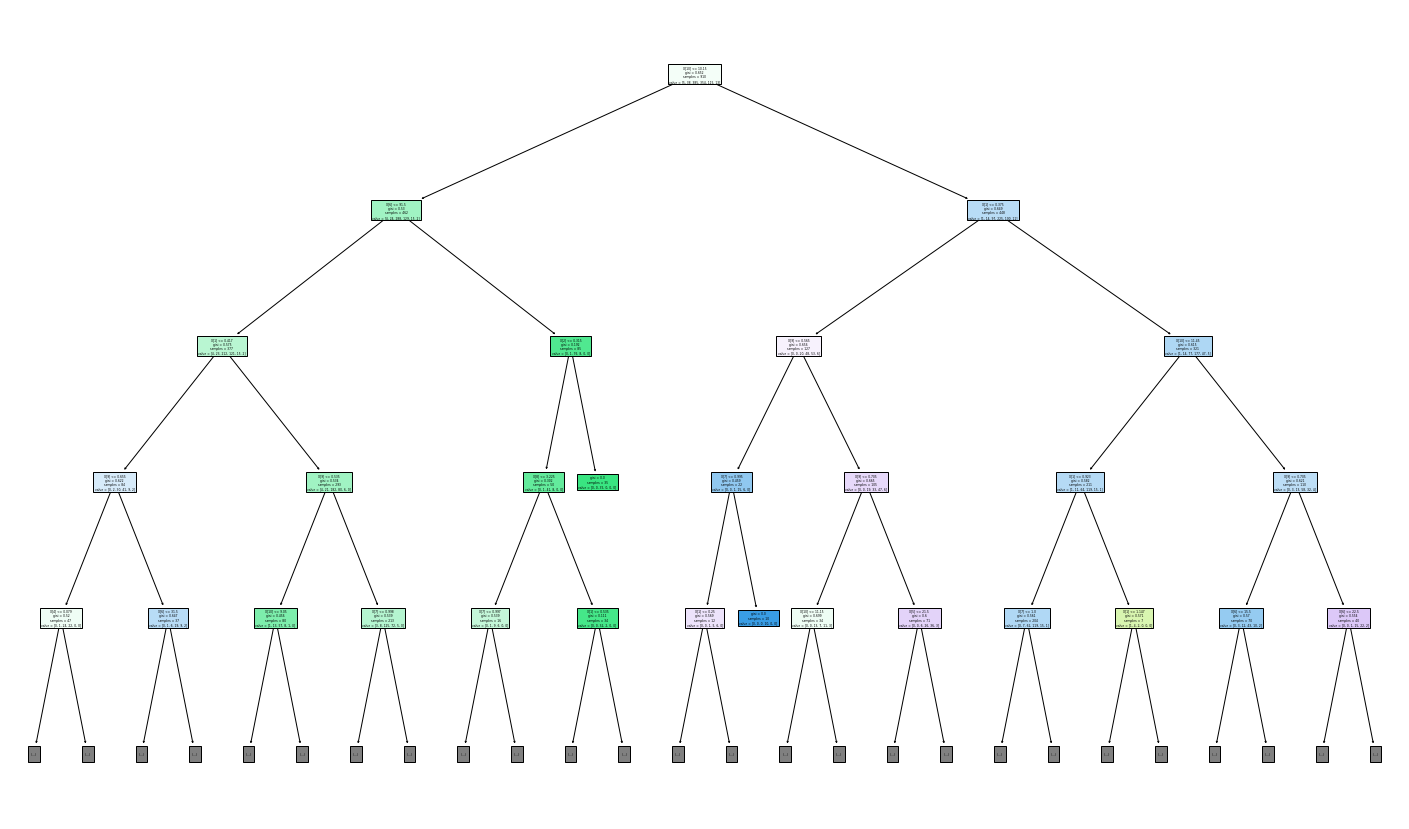

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth=4,filled=True)

In [18]:
y_pred=model.predict(X_test)
y_pred

array([4, 6, 6, 7, 4, 7, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 5, 5, 5, 7, 5, 6,
       5, 5, 6, 5, 6, 5, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6, 5, 7, 4, 5, 6, 5,
       6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 7, 5, 6, 5, 6, 5, 5, 7, 5, 7, 5, 6,
       5, 6, 5, 7, 5, 8, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 7, 5, 5,
       6, 7, 6, 5, 5, 6, 6, 6, 4, 7, 6, 5, 5, 5, 6, 5, 5, 6, 7, 6, 6, 7,
       7, 6, 5, 5, 5, 6, 4, 5, 5, 6, 5, 5, 6, 6, 5, 5, 4, 6, 5, 5, 5, 5,
       6, 5, 5, 5, 7, 6, 6, 5, 4, 5, 7, 6, 7, 6, 6, 6, 6, 6, 4, 6, 5, 5,
       6, 6, 4, 5, 7, 7, 8, 5, 5, 7, 6, 6, 6, 5, 6, 6, 6, 6, 8, 6, 7, 6,
       5, 6, 5, 7, 5, 5, 4, 5, 5, 6, 4, 5, 4, 7, 4, 5, 6, 5, 6, 6, 6, 6,
       6, 7, 5, 5, 5, 7, 5, 7, 5, 6, 6, 6, 7, 6, 5, 5, 7, 5, 6, 7, 5, 6,
       6, 7, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 7, 6, 5, 6, 5, 5, 5,
       6, 6, 7, 4, 5, 7, 5, 7, 6, 6, 7, 6, 6, 8, 5, 5, 6, 6, 7, 5, 5, 6,
       6, 6, 5, 5, 6, 6, 6, 5, 7, 5, 5, 5, 6, 7, 4, 6, 5, 7, 7, 7, 6, 6,
       5, 5, 7, 7, 5, 6, 4, 6, 6, 5, 5, 7, 4, 5, 6,

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.48329621380846327

#### Hyperparameter tuning

In [20]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [21]:
grid_search=GridSearchCV(estimator=model, param_grid=grid_param,cv=3,verbose=1)

In [22]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [23]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 7,
 'min_samples_split': 4,
 'splitter': 'random'}

In [25]:
model_with_best_param=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=7,min_samples_split=4,splitter='random')

In [27]:
model_with_best_param.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=7,
                       min_samples_split=4, splitter='random')

[Text(0.5451388888888888, 0.9285714285714286, 'X[10] <= 9.569\nentropy = 1.752\nsamples = 910\nvalue = [5, 38, 385, 354, 115, 13]'),
 Text(0.2708333333333333, 0.7857142857142857, 'X[5] <= 14.632\nentropy = 1.123\nsamples = 256\nvalue = [2, 8, 180, 64, 2, 0]'),
 Text(0.13425925925925927, 0.6428571428571429, 'X[7] <= 0.997\nentropy = 1.385\nsamples = 112\nvalue = [2, 5, 66, 37, 2, 0]'),
 Text(0.07407407407407407, 0.5, 'X[8] <= 3.363\nentropy = 1.1\nsamples = 40\nvalue = [0, 2, 30, 7, 1, 0]'),
 Text(0.05555555555555555, 0.35714285714285715, 'X[2] <= 0.221\nentropy = 1.183\nsamples = 30\nvalue = [0, 2, 22, 5, 1, 0]'),
 Text(0.037037037037037035, 0.21428571428571427, 'X[8] <= 3.299\nentropy = 1.426\nsamples = 15\nvalue = [0, 2, 10, 2, 1, 0]'),
 Text(0.018518518518518517, 0.07142857142857142, 'entropy = 1.061\nsamples = 8\nvalue = [0, 1, 6, 1, 0, 0]'),
 Text(0.05555555555555555, 0.07142857142857142, 'entropy = 1.664\nsamples = 7\nvalue = [0, 1, 4, 1, 1, 0]'),
 Text(0.07407407407407407, 0.214

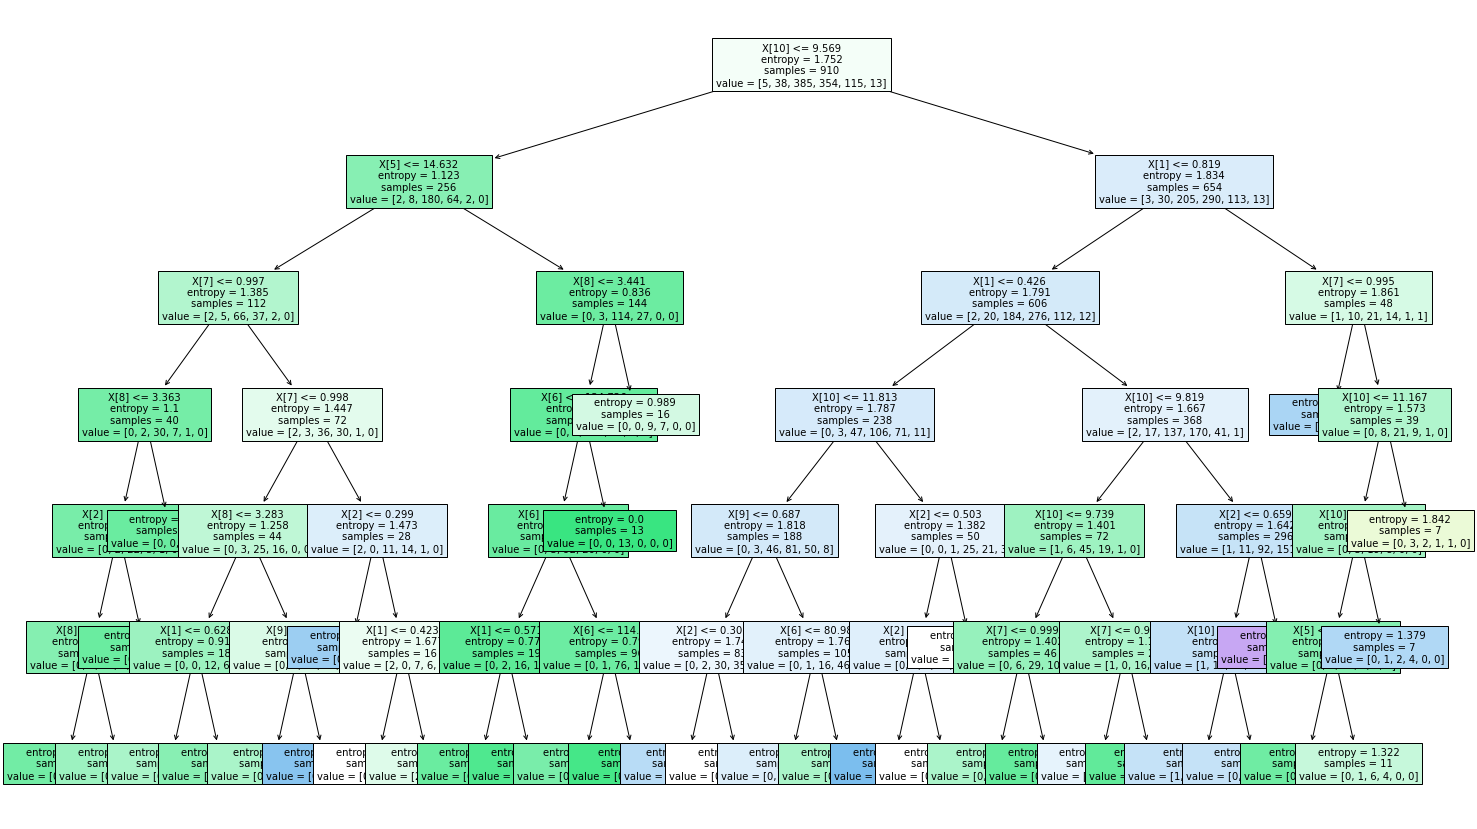

In [28]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_param,filled=True,fontsize=10)

In [29]:
y_pred2=model_with_best_param.predict(X_test)
y_pred2

array([5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6,
       5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5,
       6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6,
       5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5,
       6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6,
       5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5,
       6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5,
       5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 7, 6, 6, 5, 5, 5, 6,
       5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5,
       6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5,
       6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6,

In [30]:
accuracy_score(y_test,y_pred2)

0.5478841870824054

#### Accuracy score before hyperparameter tuning: 0.48329621380846327

#### Accuracy score after hyperparameter tuning: 0.5478841870824054